In [1]:
#Step #1: Import 

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [3]:
#Data Collection

In [4]:
df = pd.read_csv('heart_attack_data.csv', na_values='?')

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [32]:
df = df.rename(columns={'num       ': 'Y'})

df['Y'].value_counts(dropna=False)

0    163
1     98
Name: Y, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          261 non-null    int64  
 1   sex          261 non-null    int64  
 2   trestbps     261 non-null    float64
 3   chol         261 non-null    float64
 4   fbs          261 non-null    float64
 5   thalach      261 non-null    float64
 6   exang        261 non-null    float64
 7   oldpeak      261 non-null    float64
 8   Y            261 non-null    int64  
 9   cp_2         261 non-null    uint8  
 10  cp_3         261 non-null    uint8  
 11  cp_4         261 non-null    uint8  
 12  restecg_1.0  261 non-null    uint8  
 13  restecg_2.0  261 non-null    uint8  
dtypes: float64(6), int64(3), uint8(5)
memory usage: 21.7 KB


In [8]:
df = df.drop(['slope','ca','thal'], axis=1)

df = df.dropna().copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         261 non-null    int64  
 1   sex         261 non-null    int64  
 2   cp          261 non-null    int64  
 3   trestbps    261 non-null    float64
 4   chol        261 non-null    float64
 5   fbs         261 non-null    float64
 6   restecg     261 non-null    float64
 7   thalach     261 non-null    float64
 8   exang       261 non-null    float64
 9   oldpeak     261 non-null    float64
 10  num         261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


In [34]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,Y,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


In [11]:
#Creating Dummy Variables by transforming the Categorical Variables

In [35]:
df['cp'].value_counts(dropna=False)

df['restecg'].value_counts(dropna=False)

KeyError: 'cp'

In [13]:
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)

df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


In [40]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'Y'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['cp_2', 'cp_3', 'cp_4', 'exang', 'fbs', 'restecg_1.0', 'restecg_2.0', 'sex']


In [15]:
#Split Training and Test Datasets

In [41]:
random_seed = 100
df_train, df_test = train_test_split(df, test_size=0.25, random_state=random_seed, stratify=df['Y'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['Y'].value_counts(normalize=True))
print()
print(df_test['Y'].value_counts(normalize=True))

(195, 14)
(66, 14)

0    0.625641
1    0.374359
Name: Y, dtype: float64

0    0.621212
1    0.378788
Name: Y, dtype: float64


In [17]:
#scaling

In [42]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['Y']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [19]:
#Model Fitting

In [43]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(penalty='none')

In [21]:
#Evaluating

In [44]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

In [23]:
#ROC curve

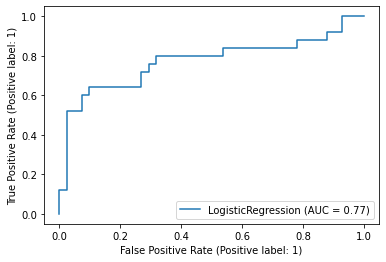

In [45]:
plot_roc_curve(clf, X_test, y_test)

In [25]:
#PR curve

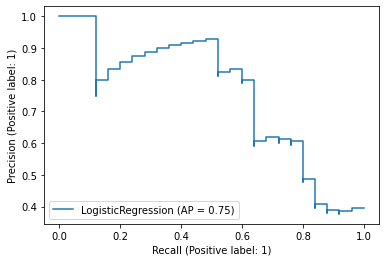

In [46]:
plot_precision_recall_curve(clf, X_test, y_test)

In [27]:
#predict_proba and predict

In [47]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [ ]:
#Log loss, AUC, Average Precision, Accuracy, Precision, Recall, F1 score, Classification report

In [48]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.68367
AUC = 0.77268
Average Precision = 0.75220

Using 0.5 as threshold:
Accuracy = 0.71212
Precision = 0.61538
Recall = 0.64000
F1 score = 0.62745

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.62      0.64      0.63        25

    accuracy                           0.71        66
   macro avg       0.70      0.70      0.70        66
weighted avg       0.71      0.71      0.71        66



In [ ]:
#confusion matrix 

Confusion Matrix


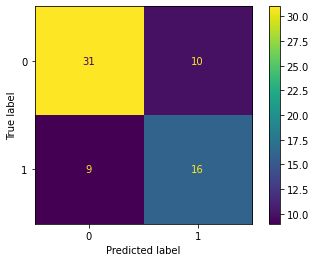

In [49]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
#Results Intrepretation

In [50]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-4.849338
1,cp_2,1.291300
2,cp_3,1.663208
3,cp_4,3.754125
4,exang,1.021904
5,fbs,3.022116
6,restecg_1.0,-1.561916
7,restecg_2.0,-1.654399
8,sex,1.786234
9,age,0.006028


In [ ]:
#variable vs sd

In [51]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,7.827472
1,trestbps,18.285011
2,chol,69.506502
3,thalach,23.930235
4,oldpeak,0.951498
